In [1]:
%load_ext autoreload
%autoreload 2

import torch
from diffusers import StableDiffusionPipeline

sd_repo = "runwayml/stable-diffusion-v1-5"
dtype = torch.float16
device = 'cuda'

pipe = StableDiffusionPipeline.from_pretrained(sd_repo, safety_checker=None).to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please 

In [ ]:
from diffusers import DPMSolverMultistepScheduler, DDIMScheduler, DDPMScheduler, PNDMScheduler

dpms = DPMSolverMultistepScheduler.from_config(pipe.config)
ddim = DDIMScheduler.from_config(pipe.config)
ddpm = DDPMScheduler.from_config(pipe.config)
pndm = PNDMScheduler.from_config(pipe.config)


schedulers = [ddpm, ddim, dpms, pndm]
timesteps = [5, 10, 50]

The config attributes {'vae': ('diffusers', 'AutoencoderKL'), 'text_encoder': ('transformers', 'CLIPTextModel'), 'tokenizer': ('transformers', 'CLIPTokenizer'), 'unet': ('diffusers', 'UNet2DConditionModel'), 'scheduler': ('diffusers', 'PNDMScheduler'), 'safety_checker': (None, None), 'feature_extractor': ('transformers', 'CLIPImageProcessor'), 'image_encoder': (None, None), 'requires_safety_checker': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
The config attributes {'vae': ('diffusers', 'AutoencoderKL'), 'text_encoder': ('transformers', 'CLIPTextModel'), 'tokenizer': ('transformers', 'CLIPTokenizer'), 'unet': ('diffusers', 'UNet2DConditionModel'), 'scheduler': ('diffusers', 'PNDMScheduler'), 'safety_checker': (None, None), 'feature_extractor': ('transformers', 'CLIPImageProcessor'), 'image_encoder': (None, None), 'requires_safety_checker': True} were passed to DDIMScheduler, but

In [46]:
from diffusers import DPMSolverMultistepScheduler

seed = 0
prompt = "Deadpool"

ims = []
for scheduler_class in schedulers:

    pipe.scheduler = scheduler_class

    scheduler_ims = []
    for steps in timesteps:
        # setup seed
        gen = torch.Generator(device=device)
        gen = gen.manual_seed(seed)
        # run inference
        im = pipe(prompt, num_inference_steps=steps, generator=gen).images[0]
        scheduler_ims.append(im)
    ims.append(scheduler_ims)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

(4, 4)


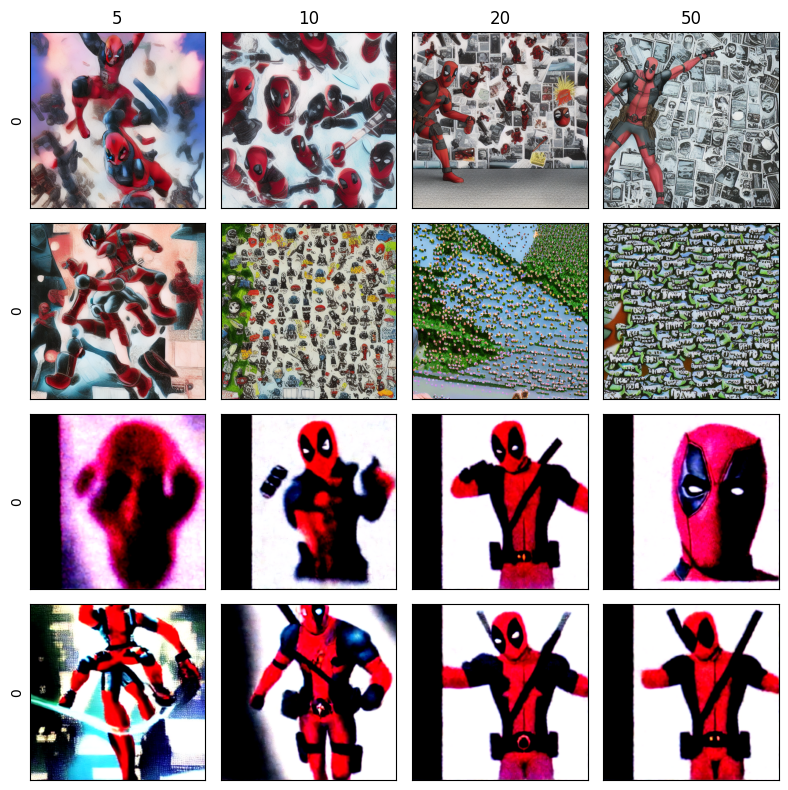

In [47]:
from text3d2video.ipython_utils import display_ims_grid

display_ims_grid(ims, col_titles=timesteps, row_titles=[0 for _ in schedulers])